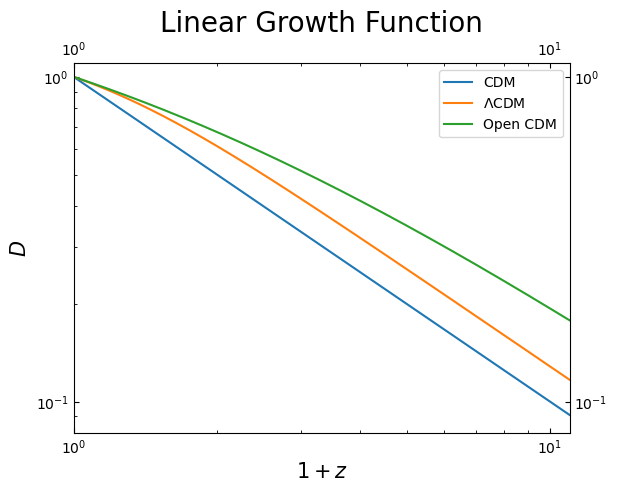

In [5]:
# linear_growth_factor

from mycosmotoolpy import linear_growth_factor
import matplotlib.pyplot as plt
import numpy as np

z=np.linspace(0,10,1000)
Dcdm=[]
Dlambdacdm=[]
Dopencdm=[]
for i in z:
    Dcdm.append(linear_growth_factor.lgf(1,0,i))
    Dlambdacdm.append(linear_growth_factor.lgf(0.3, 0.7, i))
    Dopencdm.append(linear_growth_factor.lgf(0.3, 0, i))

plt.plot(z+1, Dcdm, label='CDM')
plt.plot(z+1, Dlambdacdm, label=r'$\Lambda$CDM')
plt.plot(z+1, Dopencdm, label='Open CDM')
plt.xlabel("$1+z$", fontsize=15)
plt.ylabel("$D$", fontsize=15)
plt.tick_params(
    top='on',
    right='on',

    direction='in',
    
    labeltop='on',
    labelright='on',
)
plt.tick_params(top='on', which='minor',direction='in')
plt.tick_params(top='left', which='minor',direction='in')
plt.xlim(1, 11)
plt.ylim(0.08, 1.1)
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.title("Linear Growth Function", fontsize=20)
plt.show()

In [27]:
# sigma_8

from mycosmotoolpy import sigma_8
import pandas as pd
import numpy as np
from scipy import interpolate

for i in range(4):
    path = f"z{i}.dat"
    z = np.array(pd.read_csv(path, header=None, sep='\\s+'))
    P_interpolate = interpolate.interp1d(z[:,0], z[:,1], fill_value="extrapolate")
    print(f"sigma_8 at z_{i}: ", sigma_8.sigma_R(P_interpolate))

sigma_8 at z_0:  0.8432503534144737
sigma_8 at z_1:  0.5239238443422753
sigma_8 at z_2:  0.36258882958814914
sigma_8 at z_3:  0.27484583358364556


0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 

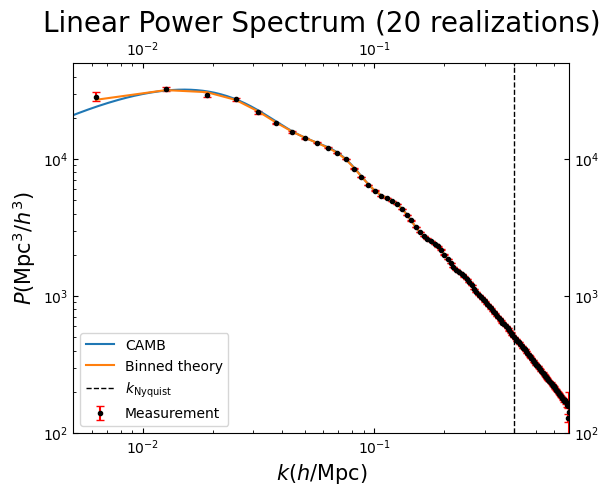

In [5]:
# initial_condition
# power_spectrum_estimator
# binninng_correction

from mycosmotoolpy import initial_condition as ic
from mycosmotoolpy import binning_correction as bc
from mycosmotoolpy import power_spectrum_estimator as pse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy.constants import pi

path0="z0.dat"
z0= np.array(pd.read_csv(path0, header=None, sep='\\s+'))
PL_fit=interpolate.interp1d(z0[:,0], z0[:,1], fill_value='extrapolate')

Ngrid = 128
L = 1000
kNyquist = pi*Ngrid/L

k, binned_theory = bc.binned_power_spectrum(PL_fit, Ngrid)[0:2]
repeat = 20 # number of realization
realization = []
for i in range(repeat):
    deltak = ic.ic_gaussian_random_field(PL_fit, Ngrid)
    realization.append(pse.power_spectrum_estimator(deltak, Ngrid)[1])
    print(i, end=' ')
realization = np.array(realization)
ensemble_mean = np.mean(realization, axis=0)
ensemble_std = np.std(realization, axis=0, ddof=1)/(repeat)**(1/2)

plt.errorbar(k, ensemble_mean, yerr=ensemble_std, fmt='.', color='black', ecolor='red', capsize=3, label='Measurement')
plt.plot(z0[:,0], z0[:,1], label='CAMB')
plt.plot(k, binned_theory, label='Binned theory')
plt.axvline(kNyquist, linewidth=1, linestyle='--', color='k', label=r'$k_\mathrm{Nyquist}$')
plt.xlabel("$k$($h$/Mpc)", fontsize=15)
plt.ylabel('$P$(Mpc$^3/h^3$)', fontsize=15)
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.005,np.max(k))
plt.ylim([100,50000])
plt.tick_params(
    top='on',
    right='on',

    direction='in',
    
    labeltop='on',
    labelright='on',
)
plt.tick_params(top='on', which='minor',direction='in')
plt.legend()
plt.title('Linear Power Spectrum (20 realizations)', fontsize=20)
plt.show()

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 

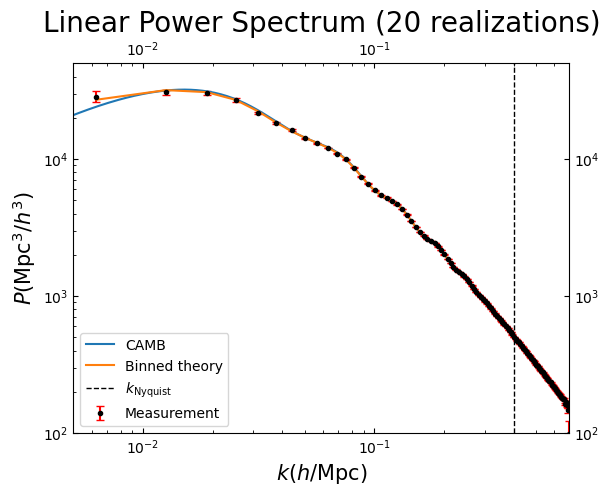

In [3]:
# initial_condition
# cpower_spectrum_estimator_half
# binninng_correction

from mycosmotoolpy import initial_condition as ic
from mycosmotoolpy import binning_correction as bc
from mycosmotoolpy import cpseh
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy.constants import pi

path0="z0.dat"
z0= np.array(pd.read_csv(path0, header=None, sep='\\s+'))
PL_fit=interpolate.interp1d(z0[:,0], z0[:,1], fill_value='extrapolate')

Ngrid = 128
L = 1000
kNyquist = pi*Ngrid/L

k, binned_theory = bc.binned_power_spectrum(PL_fit, Ngrid)[0:2]
repeat = 20 # number of realization
realization = []
for i in range(repeat):
    deltak = ic.ic_gaussian_random_field(PL_fit, Ngrid)
    realization.append(cpseh.power_spectrum_estimator(deltak, Ngrid)[1])
    print(i, end=' ')
realization = np.array(realization, dtype=np.float64)
ensemble_mean = np.mean(realization, axis=0)
ensemble_std = np.std(realization, axis=0, ddof=1)/(repeat)**(1/2)

plt.errorbar(k, ensemble_mean, yerr=ensemble_std, fmt='.', color='black', ecolor='red', capsize=3, label='Measurement')
plt.plot(z0[:,0], z0[:,1], label='CAMB')
plt.plot(k, binned_theory, label='Binned theory')
plt.axvline(kNyquist, linewidth=1, linestyle='--', color='k', label=r'$k_\mathrm{Nyquist}$')
plt.xlabel("$k$($h$/Mpc)", fontsize=15)
plt.ylabel('$P$(Mpc$^3/h^3$)', fontsize=15)
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.005,np.max(k))
plt.ylim([100,50000])
plt.tick_params(
    top='on',
    right='on',

    direction='in',
    
    labeltop='on',
    labelright='on',
)
plt.tick_params(top='on', which='minor',direction='in')
plt.legend()
plt.title('Linear Power Spectrum (20 realizations)', fontsize=20)
plt.show()

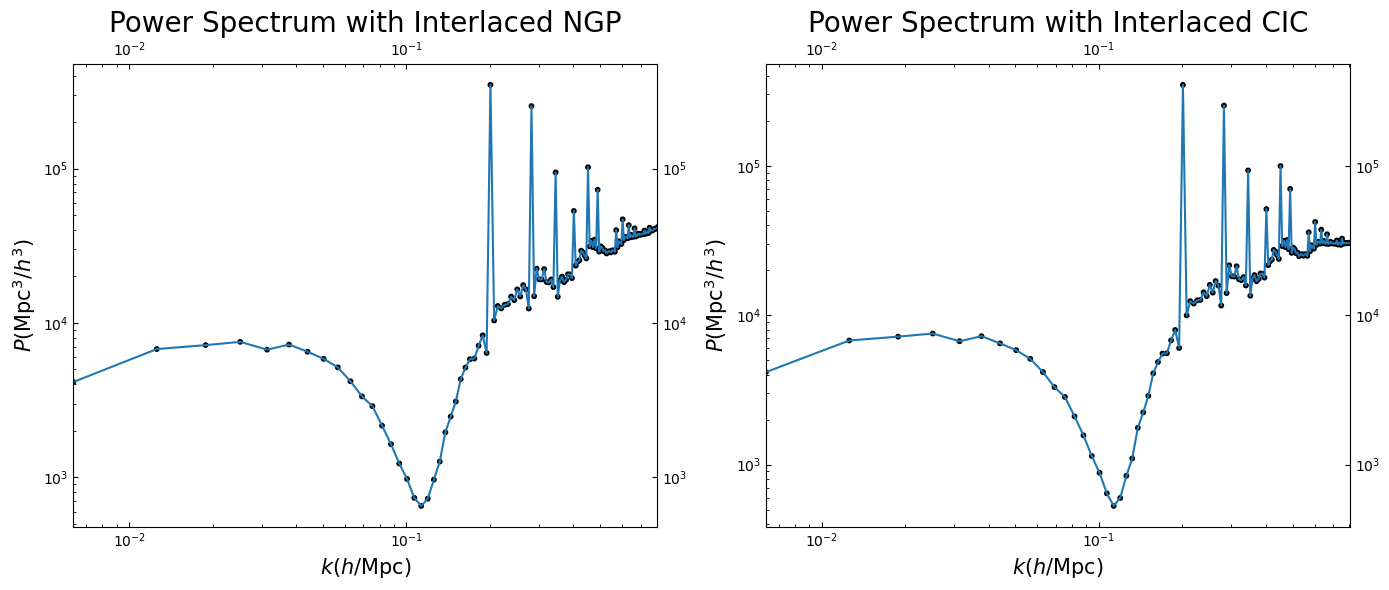

In [17]:
# paint

from mycosmotoolpy import paint, cpseh
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import pi

Ngrid = 256
L = 1000
side_length = L/Ngrid
kNyquist = pi/side_length

position_file = 'fakedata_1.0000/fakedata_1.0000/1/Position/000000'
position = np.fromfile(position_file, dtype=np.float32, count=-1)*0.6732117
position = np.reshape(position,(32**3,3))

k, ps_ngp = cpseh.power_spectrum_estimator(paint.ngp(position, Ngrid), Ngrid)[0:2]
k, ps_cic = cpseh.power_spectrum_estimator(paint.cic(position, Ngrid), Ngrid)[0:2]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].scatter(k, ps_ngp, color='black', s=[10]*np.size(k))
axes[0].plot(k, ps_ngp)
axes[0].set_xlabel("$k$($h$/Mpc)", fontsize=15)
axes[0].set_ylabel('$P$(Mpc$^3/h^3$)', fontsize=15)
axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].set_xlim(np.min(k), kNyquist)
axes[0].tick_params(
    top='on',
    right='on',

    direction='in',
    
    labeltop='on',
    labelright='on',
)
axes[0].tick_params(top='on', which='minor',direction='in')
axes[0].set_title('Power Spectrum with Interlaced NGP', fontsize=20)

axes[1].scatter(k, ps_cic, color='black', s=[10]*np.size(k))
axes[1].plot(k, ps_cic)
axes[1].set_xlabel("$k$($h$/Mpc)", fontsize=15)
axes[1].set_ylabel('$P$(Mpc$^3/h^3$)', fontsize=15)
axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[1].set_xlim(np.min(k), kNyquist)
axes[1].tick_params(
    top='on',
    right='on',

    direction='in',
    
    labeltop='on',
    labelright='on',
)
axes[1].tick_params(top='on', which='minor',direction='in')
axes[1].set_title('Power Spectrum with Interlaced CIC', fontsize=20)
plt.tight_layout()
plt.show()

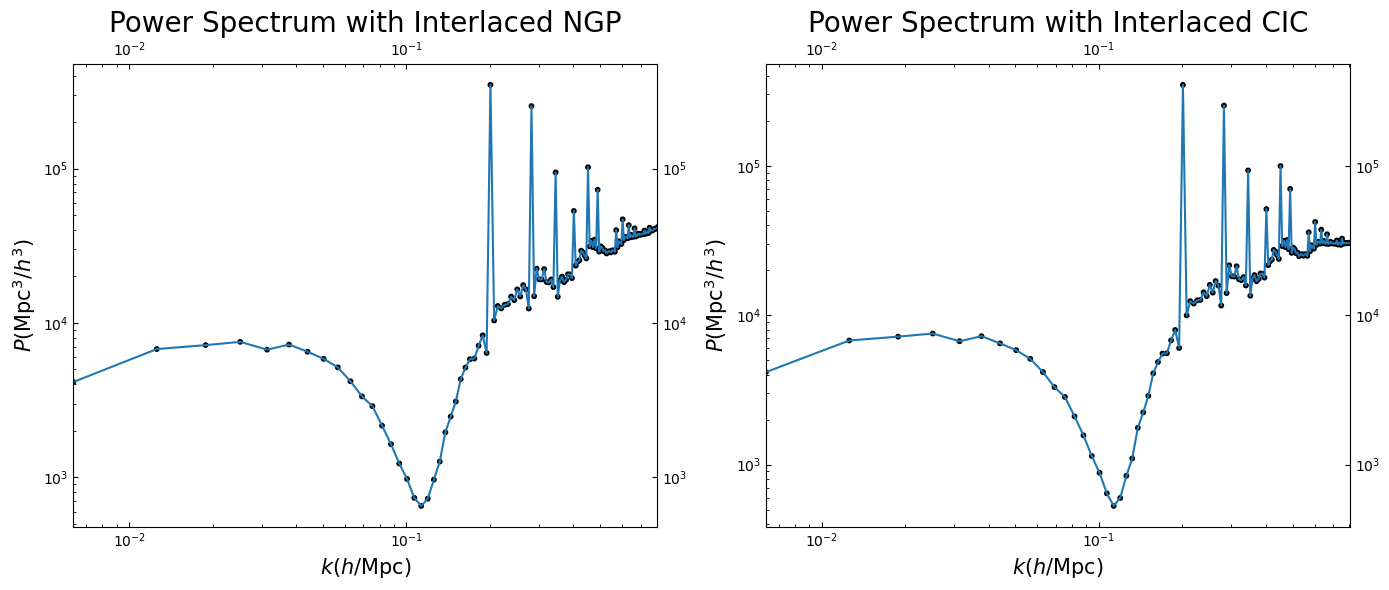

In [1]:
# cpaint_half

from mycosmotoolpy import cpaint_half, cpseh
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import pi

Ngrid = 256
L = 1000
side_length = L/Ngrid
kNyquist = pi/side_length

position_file = 'fakedata_1.0000/fakedata_1.0000/1/Position/000000'
position = np.fromfile(position_file, dtype=np.float32, count=-1)*0.6732117
position = np.reshape(position,(32**3,3))

k, ps_ngp = cpseh.power_spectrum_estimator(cpaint_half.ngp_interlace(position, Ngrid), Ngrid)[0:2]
k, ps_cic = cpseh.power_spectrum_estimator(cpaint_half.cic_interlace(position, Ngrid), Ngrid)[0:2]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].scatter(k, ps_ngp, color='black', s=[10]*np.size(k))
axes[0].plot(k, ps_ngp)
axes[0].set_xlabel("$k$($h$/Mpc)", fontsize=15)
axes[0].set_ylabel('$P$(Mpc$^3/h^3$)', fontsize=15)
axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].set_xlim(np.min(k), kNyquist)
axes[0].tick_params(
    top='on',
    right='on',

    direction='in',
    
    labeltop='on',
    labelright='on',
)
axes[0].tick_params(top='on', which='minor',direction='in')
axes[0].set_title('Power Spectrum with Interlaced NGP', fontsize=20)

axes[1].scatter(k, ps_cic, color='black', s=[10]*np.size(k))
axes[1].plot(k, ps_cic)
axes[1].set_xlabel("$k$($h$/Mpc)", fontsize=15)
axes[1].set_ylabel('$P$(Mpc$^3/h^3$)', fontsize=15)
axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[1].set_xlim(np.min(k), kNyquist)
axes[1].tick_params(
    top='on',
    right='on',

    direction='in',
    
    labeltop='on',
    labelright='on',
)
axes[1].tick_params(top='on', which='minor',direction='in')
axes[1].set_title('Power Spectrum with Interlaced CIC', fontsize=20)
plt.tight_layout()
plt.show()